In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random

# Based on https://fivethirtyeight.com/features/can-you-beat-the-goat-monty-hall-problem/
# Play the riddler monte hall game 10**n times
def play_riddler_monte_hall(n, number_of_doors = 3):
    number_of_games = 10**n
    games_with_revealable_goat = 0
    switcher_wins = 0
    stayer_wins = 0

    for game in range(number_of_games):
        doors = [door for door in range(0,number_of_doors)]

        # Monty chooses a number of goats randomly: 0, 1, ... number_of_doors
        goats = random.randint(0, number_of_doors)

        # Monty randomly chooses one (unique) door per goat
        doors_with_goats = random.sample(doors, k=goats)

        # Contestant chooses one door
        chosen_door = random.choice(doors)

        # Monty checks if he can reveal a goat behind a different door
        doors_not_chosen = [door for door in doors if door != chosen_door]
        doors_not_chosen_with_goats = [door for door in doors_not_chosen if door in doors_with_goats]

        # If he can't reveal a goat behind a different door, this is not the
        # situation in the riddle, so continue
        if not doors_not_chosen_with_goats:
            continue
        else:
            games_with_revealable_goat += 1

        # Monty selects a door not chosen with a goat and reveals it
        door_with_revealed_goat = random.choice(doors_not_chosen_with_goats)
        doors_player_can_switch_to = [door for door in doors_not_chosen if door != door_with_revealed_goat]

        # The player chooses a door to switch to
        door_player_might_switch_to = random.choice(doors_player_can_switch_to)

        # If the player is a switcher (always switches to a different door), 
        # does the player win?
        if door_player_might_switch_to not in doors_with_goats:
            switcher_wins += 1

        # If the player is a stayer (always stays with the first chosen door), 
        # does the player win?
        if chosen_door not in doors_with_goats:
            stayer_wins += 1

    switcher_win_percentage = float(switcher_wins)/float(games_with_revealable_goat)
    stayer_win_percentage = float(stayer_wins)/float(games_with_revealable_goat)
    game_results = [games_with_revealable_goat, switcher_win_percentage, stayer_win_percentage]

    print(game_results)
    return game_results

def plot_game_results(game_results, number_of_doors = 3):
    plt.clf()
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_facecolor('black')
    ax.set_facecolor('black')
    ax.tick_params(color='white', labelcolor='white', labelsize=18)
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    plt.plot(game_results[:,0], 100.0 * game_results[:,1], 'o-', label="Always switch")
    plt.plot(game_results[:,0], 100.0 * game_results[:,2], 'o-', label="Never switch")

    plt.xlabel('# games where Monte reveals a goat', fontsize=18, color='white')
    plt.ylabel('Win %', fontsize=18, color='white')
    plt.legend(loc='best')

    plt.grid()
    plt.title(str(number_of_doors)+" doors", fontsize=18, color='white')
    leg = plt.legend(loc='best', prop={'size': 14}, ncol=1)
    frame = leg.get_frame()
    frame.set_color('black')
    frame.set_edgecolor('white')
    for text in leg.get_texts():
        text.set_color('White')


    plt.xscale("log")
    plt.show()

def play_games_and_plot_results(n_max = 6, number_of_doors = 3):
    results_vs_games_played_list = []
    for i in range(1, n_max + 1):
        results_vs_games_played_list.append(np.array(play_riddler_monte_hall(i, number_of_doors)))
    results_vs_games_played = np.array(results_vs_games_played_list)
    plot_game_results(results_vs_games_played, number_of_doors)

[7, 0.2857142857142857, 0.42857142857142855]
[64, 0.5, 0.390625]
[665, 0.5097744360902255, 0.3609022556390977]
[6656, 0.49263822115384615, 0.3643329326923077]
[66466, 0.49912737339391566, 0.37291246652423793]
[666294, 0.4996818221385755, 0.37521124308488446]


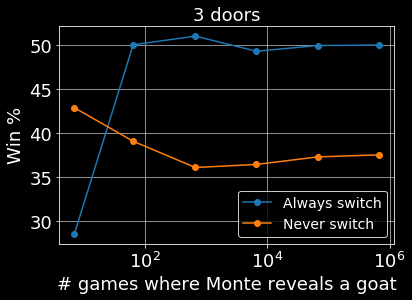

In [2]:
# The problem as posed on the riddler
play_games_and_plot_results(6, 3)

[7, 0.42857142857142855, 0.14285714285714285]
[86, 0.47674418604651164, 0.4883720930232558]
[893, 0.48712206047032475, 0.42889137737961924]
[8988, 0.49210057854917666, 0.45816644414775254]
[90202, 0.498303807010931, 0.45409192700827034]
[900121, 0.5000527706830526, 0.4543844660884481]


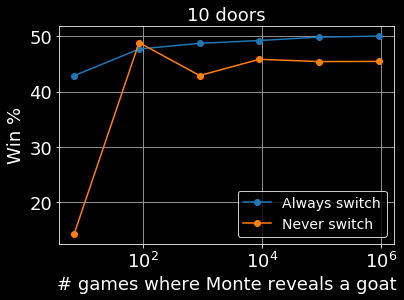

In [3]:
# Generalize the problem: same as the Riddler's version, except
#   1. N doors instead of 3
#   2. Monte chooses to place 0, 1, ..., N goats
#   3. The player, if choosing to switch, randomly
#      chooses which door to switch to
play_games_and_plot_results(6, 10)


[10, 0.6, 0.4]
[98, 0.5306122448979592, 0.5102040816326531]
[991, 0.49747729566094856, 0.49041372351160445]
[9906, 0.49202503533212194, 0.49222693317181504]
[98971, 0.49742853967323764, 0.4967616776631539]
[989894, 0.4999919183266087, 0.494758024596573]


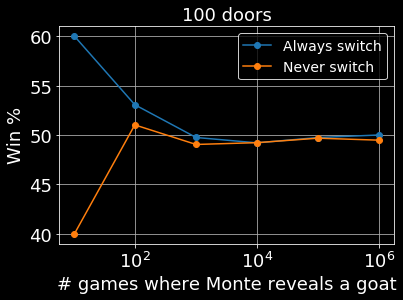

In [4]:
# Generalize the problem: same as the Riddler's version, except
#   1. N doors instead of 3
#   2. Monte chooses to place 0, 1, ..., N goats
#   3. The player, if choosing to switch, randomly
#      chooses which door to switch to
play_games_and_plot_results(6, 100)

[8, 0.875, 0.75]
[74, 0.5, 0.32432432432432434]
[664, 0.4894578313253012, 0.3795180722891566]
[6710, 0.49239940387481373, 0.3789865871833085]
[66405, 0.49741736315036517, 0.3773360439725924]
[666052, 0.5007326755268358, 0.37520944310654425]
[6667552, 0.49997315356520655, 0.37483262222776814]
[66672507, 0.5000375192131293, 0.3750097022750322]


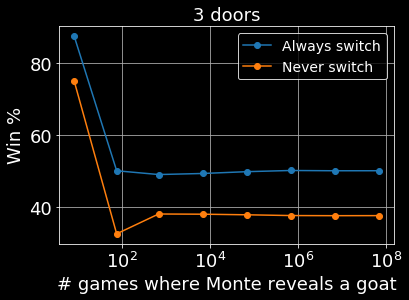

In [5]:
# The problem as posed on the riddler, with more games played
# This can take a while
play_games_and_plot_results(8, 3)